#### Q1
Equation of Hyperplane : w.x+b=0

Equation of marginal plane to the left of the Hyperplane : w.x+b = +1

Equation of marginal plane to the right of the Hyperplane : w.x+b = -1

Distance between both planes = 2/||w||

Aim is to maximize this distance between two planes.

Or minimise the cost fucnction : ||w|| / 2 + hinge Loss


#### Q2
Objective of linear SVM is to find a hyperplane that can segregate the datapoints into their classes, such that datapoints to the left of the hyperplane belongs to one class and datapoints to the right of the hyperplane belongs to another class. And the hyperplane is selected such that the distance between the marginal planes is the maximum.

#### Q3.
Kernel is SVM is used mainly for the non-linear data. It is used to increase the dimesntionality of the dataset such that the datapoints can be seperated and linear SVM can be applied to that dataeset.

#### Q4.
Support vectors in SVM are used to draw the marginal planes passing throught these support nodes wrt to that hyperplane. Which helps to select the best hyperplane for that dataset by maximizing the distnace between both the marginal planes.

#### Q5. 
Hard margin : All the datapoints are seperated accuratly with the help of marginal planes.

Soft margin : Some of the datapoints are not follwing the segragation done by the hyperplane and marginal plane, so we allow some datapoint to do so such that our model can work in better way. As in real world secenerio datapoints will be mixed.

#### Q6.

In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset = load_iris()

In [14]:
x=dataset.data

In [15]:
y=dataset.target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
from sklearn.svm import SVC

In [31]:
classifier = SVC(kernel = 'linear')

In [32]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [33]:
classifier.coef_

array([[-0.42779945,  0.33137102, -0.87375306, -0.90993423],
       [-0.06152941,  0.13825679, -0.54254145, -0.54660919],
       [ 0.22183921,  0.76907322, -2.4029882 , -2.11928384]])

In [37]:
y_pred = classifier.predict(x_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
print(accuracy_score(y_test,y_pred))

0.9736842105263158


In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [42]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [43]:
from sklearn.inspection import DecisionBoundaryDisplay

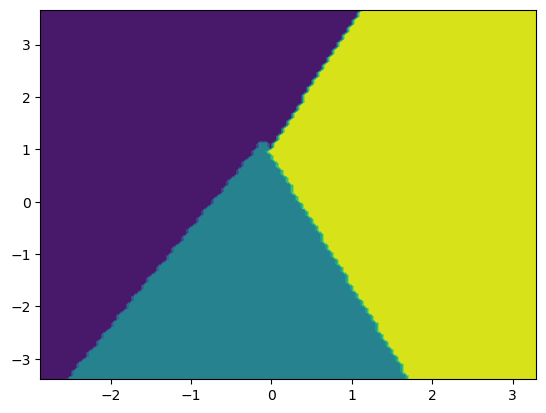

In [50]:
DecisionBoundaryDisplay.from_estimator(classifier.fit(x_train[:,0:2],y_train),x_train[:,0:2],response_method='predict')

In [51]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = { 'C' : [0.1,1,10,100,1000],
              'gamma' : [1,0.1,0.01,0.001,0.0001],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
            }

In [57]:
grid = GridSearchCV(SVC(),param_grid = param_grid,cv=5,refit=True)

In [58]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [59]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}